[View in Colaboratory](https://colab.research.google.com/github/jrandson/deep-learning/blob/master/Exploring_Underfinting_and_overfting.ipynb)

* tf.keras.layers
* tf.keras.Model
* tf.contrib.summary
* tfe.metrics
* object-based saving

So the model will work with the eager and graphs

import tensorflow as tf

tf.enable_eager_execution()

import tensorflow.contrib.eager as tfe 



In [1]:
import tensorflow as tf
from tensorflow import keras

import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

1.10.1


In [2]:
NUM_WORDS = 10000

(train_data, train_labels), (test_data, test_labels) = keras.datasets.imdb.load_data(num_words=NUM_WORDS)

def multi_hot_sequences(sequences, dimension):
    # Create an all-zero matrix of shape (len(sequences), dimension)
    results = np.zeros((len(sequences), dimension))
    for i, word_indices in enumerate(sequences):
        results[i, word_indices] = 1.0  # set specific indices of results[i] to 1s
    return results


train_data = multi_hot_sequences(train_data, dimension=NUM_WORDS)
test_data = multi_hot_sequences(test_data, dimension=NUM_WORDS)

17465344/17464789 [==============================] - 0s 0us/step


In [3]:
train_data[:3]

array([[0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.]])

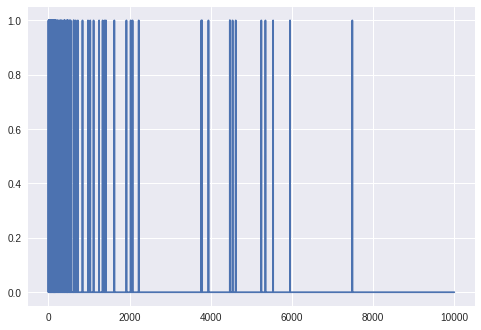

In [4]:
plt.plot(train_data[0])

In [5]:
baseline_model = keras.Sequential([
    # `input_shape` is only required here so that `.summary` works. 
    keras.layers.Dense(16, activation=tf.nn.relu, input_shape=(NUM_WORDS,)),
    keras.layers.Dense(16, activation=tf.nn.relu),
    keras.layers.Dense(1, activation=tf.nn.sigmoid)
])

baseline_model.compile(optimizer='adam',
                       loss='binary_crossentropy',
                       metrics=['accuracy', 'binary_crossentropy'])

baseline_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 16)                160016    
_________________________________________________________________
dense_1 (Dense)              (None, 16)                272       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 17        
Total params: 160,305
Trainable params: 160,305
Non-trainable params: 0
_________________________________________________________________


In [6]:
baseline_history = baseline_model.fit(train_data,
                                      train_labels,
                                      epochs=20,
                                      batch_size=512,
                                      validation_data=(test_data, test_labels),
                                      verbose=2)

Train on 25000 samples, validate on 25000 samples
Epoch 1/20
 - 4s - loss: 0.5181 - acc: 0.8035 - binary_crossentropy: 0.5181 - val_loss: 0.3731 - val_acc: 0.8672 - val_binary_crossentropy: 0.3731
Epoch 2/20
 - 3s - loss: 0.2743 - acc: 0.9053 - binary_crossentropy: 0.2743 - val_loss: 0.2888 - val_acc: 0.8879 - val_binary_crossentropy: 0.2888
Epoch 3/20
 - 3s - loss: 0.1962 - acc: 0.9315 - binary_crossentropy: 0.1962 - val_loss: 0.2855 - val_acc: 0.8876 - val_binary_crossentropy: 0.2855
Epoch 4/20
 - 3s - loss: 0.1556 - acc: 0.9469 - binary_crossentropy: 0.1556 - val_loss: 0.3047 - val_acc: 0.8805 - val_binary_crossentropy: 0.3047
Epoch 5/20
 - 3s - loss: 0.1267 - acc: 0.9584 - binary_crossentropy: 0.1267 - val_loss: 0.3306 - val_acc: 0.8757 - val_binary_crossentropy: 0.3306
Epoch 6/20
 - 3s - loss: 0.1012 - acc: 0.9691 - binary_crossentropy: 0.1012 - val_loss: 0.3590 - val_acc: 0.8711 - val_binary_crossentropy: 0.3590
Epoch 7/20
 - 3s - loss: 0.0777 - acc: 0.9784 - binary_crossentropy:

dict_keys(['val_loss', 'val_acc', 'val_binary_crossentropy', 'loss', 'acc', 'binary_crossentropy'])

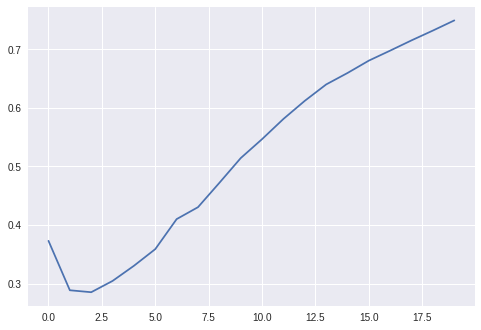

In [28]:
smaller_model = keras.Sequential([
    keras.layers.Dense(4, activation=tf.nn.relu, input_shape=(NUM_WORDS,)),
    keras.layers.Dense(4, activation=tf.nn.relu),
    keras.layers.Dense(1, activation=tf.nn.sigmoid)
])

smaller_model.compile(optimizer='adam',
                loss='binary_crossentropy',
                metrics=['accuracy', 'binary_crossentropy'])

smaller_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 4)                 40004     
_________________________________________________________________
dense_4 (Dense)              (None, 4)                 20        
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 5         
Total params: 40,029
Trainable params: 40,029
Non-trainable params: 0
_________________________________________________________________


In [29]:
smaller_history = smaller_model.fit(train_data,
                                      train_labels,
                                      epochs=20,
                                      batch_size=512,
                                      validation_data=(test_data, test_labels),
                                      verbose=2)

Train on 25000 samples, validate on 25000 samples
Epoch 1/20
 - 3s - loss: 0.5783 - acc: 0.7516 - binary_crossentropy: 0.5783 - val_loss: 0.4656 - val_acc: 0.8543 - val_binary_crossentropy: 0.4656
Epoch 2/20
 - 3s - loss: 0.3758 - acc: 0.8854 - binary_crossentropy: 0.3758 - val_loss: 0.3572 - val_acc: 0.8761 - val_binary_crossentropy: 0.3572
Epoch 3/20
 - 3s - loss: 0.2854 - acc: 0.9080 - binary_crossentropy: 0.2854 - val_loss: 0.3116 - val_acc: 0.8842 - val_binary_crossentropy: 0.3116
Epoch 4/20
 - 3s - loss: 0.2357 - acc: 0.9231 - binary_crossentropy: 0.2357 - val_loss: 0.2928 - val_acc: 0.8869 - val_binary_crossentropy: 0.2928
Epoch 5/20
 - 3s - loss: 0.2035 - acc: 0.9341 - binary_crossentropy: 0.2035 - val_loss: 0.2863 - val_acc: 0.8865 - val_binary_crossentropy: 0.2863
Epoch 6/20
 - 3s - loss: 0.1797 - acc: 0.9410 - binary_crossentropy: 0.1797 - val_loss: 0.2839 - val_acc: 0.8876 - val_binary_crossentropy: 0.2839
Epoch 7/20
 - 3s - loss: 0.1610 - acc: 0.9482 - binary_crossentropy:

In [31]:
bigger_model = keras.models.Sequential([
    keras.layers.Dense(512, activation=tf.nn.relu, input_shape=(NUM_WORDS,)),
    keras.layers.Dense(512, activation=tf.nn.relu),
    keras.layers.Dense(1, activation=tf.nn.sigmoid)
])

bigger_model.compile(optimizer='adam',
                     loss='binary_crossentropy',
                     metrics=['accuracy','binary_crossentropy'])

bigger_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 512)               5120512   
_________________________________________________________________
dense_7 (Dense)              (None, 512)               262656    
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 513       
Total params: 5,383,681
Trainable params: 5,383,681
Non-trainable params: 0
_________________________________________________________________


In [32]:
bigger_history = bigger_model.fit(train_data, train_labels,
                                  epochs=20,
                                  batch_size=512,
                                  validation_data=(test_data, test_labels),
                                  verbose=2)

Train on 25000 samples, validate on 25000 samples
Epoch 1/20
 - 4s - loss: 0.3509 - acc: 0.8501 - binary_crossentropy: 0.3509 - val_loss: 0.2930 - val_acc: 0.8812 - val_binary_crossentropy: 0.2930
Epoch 2/20
 - 4s - loss: 0.1408 - acc: 0.9486 - binary_crossentropy: 0.1408 - val_loss: 0.3602 - val_acc: 0.8629 - val_binary_crossentropy: 0.3602
Epoch 3/20
 - 4s - loss: 0.0493 - acc: 0.9856 - binary_crossentropy: 0.0493 - val_loss: 0.4266 - val_acc: 0.8696 - val_binary_crossentropy: 0.4266
Epoch 4/20
 - 4s - loss: 0.0075 - acc: 0.9991 - binary_crossentropy: 0.0075 - val_loss: 0.5792 - val_acc: 0.8716 - val_binary_crossentropy: 0.5792
Epoch 5/20
 - 4s - loss: 9.7295e-04 - acc: 1.0000 - binary_crossentropy: 9.7295e-04 - val_loss: 0.6755 - val_acc: 0.8715 - val_binary_crossentropy: 0.6755
Epoch 6/20
 - 4s - loss: 8.2010e-04 - acc: 1.0000 - binary_crossentropy: 8.2010e-04 - val_loss: 0.6973 - val_acc: 0.8722 - val_binary_crossentropy: 0.6973
Epoch 7/20
 - 4s - loss: 1.7177e-04 - acc: 1.0000 - 

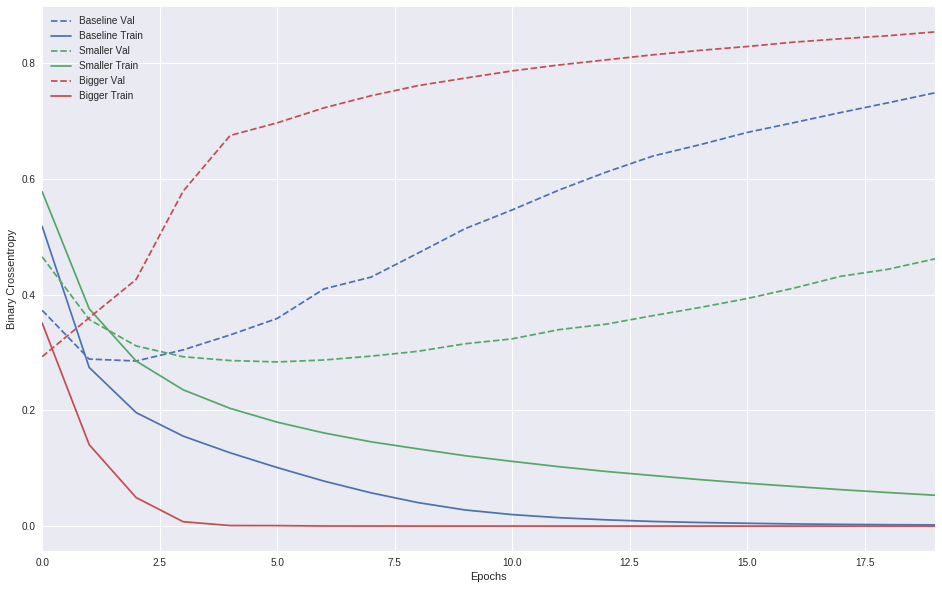

In [33]:
def plot_history(histories, key='binary_crossentropy'):
  plt.figure(figsize=(16,10))
    
  for name, history in histories:
    val = plt.plot(history.epoch, history.history['val_'+key],
                   '--', label=name.title()+' Val')
    plt.plot(history.epoch, history.history[key], color=val[0].get_color(),
             label=name.title()+' Train')

  plt.xlabel('Epochs')
  plt.ylabel(key.replace('_',' ').title())
  plt.legend()

  plt.xlim([0,max(history.epoch)])


plot_history([('baseline', baseline_history),
              ('smaller', smaller_history),
              ('bigger', bigger_history)])

In [34]:
l2_model = keras.models.Sequential([
    keras.layers.Dense(16, kernel_regularizer=keras.regularizers.l2(0.001),
                       activation=tf.nn.relu, input_shape=(NUM_WORDS,)),
    keras.layers.Dense(16, kernel_regularizer=keras.regularizers.l2(0.001),
                       activation=tf.nn.relu),
    keras.layers.Dense(1, activation=tf.nn.sigmoid)
])

l2_model.compile(optimizer='adam',
                 loss='binary_crossentropy',
                 metrics=['accuracy', 'binary_crossentropy'])

l2_model_history = l2_model.fit(train_data, train_labels,
                                epochs=20,
                                batch_size=512,
                                validation_data=(test_data, test_labels),
                                verbose=2)

Train on 25000 samples, validate on 25000 samples
Epoch 1/20
 - 4s - loss: 0.5431 - acc: 0.8009 - binary_crossentropy: 0.5044 - val_loss: 0.3946 - val_acc: 0.8738 - val_binary_crossentropy: 0.3529
Epoch 2/20
 - 3s - loss: 0.3166 - acc: 0.9058 - binary_crossentropy: 0.2696 - val_loss: 0.3386 - val_acc: 0.8874 - val_binary_crossentropy: 0.2879
Epoch 3/20
 - 3s - loss: 0.2644 - acc: 0.9246 - binary_crossentropy: 0.2112 - val_loss: 0.3379 - val_acc: 0.8862 - val_binary_crossentropy: 0.2829
Epoch 4/20
 - 3s - loss: 0.2392 - acc: 0.9366 - binary_crossentropy: 0.1827 - val_loss: 0.3474 - val_acc: 0.8844 - val_binary_crossentropy: 0.2900
Epoch 5/20
 - 3s - loss: 0.2260 - acc: 0.9425 - binary_crossentropy: 0.1669 - val_loss: 0.3590 - val_acc: 0.8802 - val_binary_crossentropy: 0.2992
Epoch 6/20
 - 3s - loss: 0.2129 - acc: 0.9485 - binary_crossentropy: 0.1525 - val_loss: 0.3710 - val_acc: 0.8775 - val_binary_crossentropy: 0.3102
Epoch 7/20
 - 3s - loss: 0.2061 - acc: 0.9513 - binary_crossentropy:

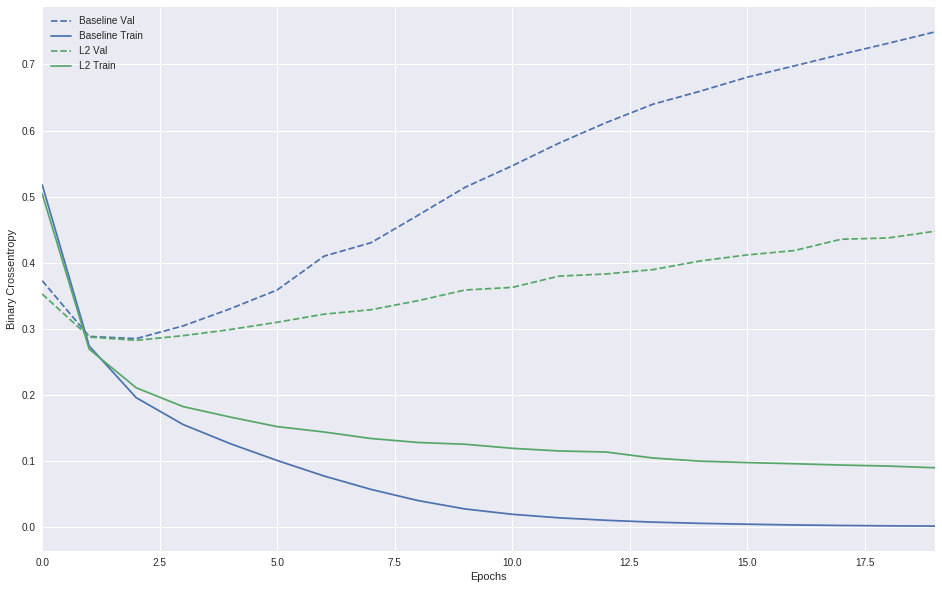

In [35]:
plot_history([('baseline', baseline_history),
              ('l2', l2_model_history)])

In [36]:
dpt_model = keras.models.Sequential([
    keras.layers.Dense(16, activation=tf.nn.relu, input_shape=(NUM_WORDS,)),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(16, activation=tf.nn.relu),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(1, activation=tf.nn.sigmoid)
])

dpt_model.compile(optimizer='adam',
                  loss='binary_crossentropy',
                  metrics=['accuracy','binary_crossentropy'])

dpt_model_history = dpt_model.fit(train_data, train_labels,
                                  epochs=20,
                                  batch_size=512,
                                  validation_data=(test_data, test_labels),
                                  verbose=2)

Train on 25000 samples, validate on 25000 samples
Epoch 1/20
 - 3s - loss: 0.6196 - acc: 0.6522 - binary_crossentropy: 0.6196 - val_loss: 0.4850 - val_acc: 0.8506 - val_binary_crossentropy: 0.4850
Epoch 2/20
 - 3s - loss: 0.4489 - acc: 0.8112 - binary_crossentropy: 0.4489 - val_loss: 0.3427 - val_acc: 0.8795 - val_binary_crossentropy: 0.3427
Epoch 3/20
 - 3s - loss: 0.3492 - acc: 0.8694 - binary_crossentropy: 0.3492 - val_loss: 0.2892 - val_acc: 0.8870 - val_binary_crossentropy: 0.2892
Epoch 4/20
 - 3s - loss: 0.2861 - acc: 0.8968 - binary_crossentropy: 0.2861 - val_loss: 0.2752 - val_acc: 0.8877 - val_binary_crossentropy: 0.2752
Epoch 5/20
 - 3s - loss: 0.2434 - acc: 0.9146 - binary_crossentropy: 0.2434 - val_loss: 0.2761 - val_acc: 0.8883 - val_binary_crossentropy: 0.2761
Epoch 6/20
 - 3s - loss: 0.2101 - acc: 0.9280 - binary_crossentropy: 0.2101 - val_loss: 0.2863 - val_acc: 0.8857 - val_binary_crossentropy: 0.2863
Epoch 7/20
 - 3s - loss: 0.1843 - acc: 0.9358 - binary_crossentropy:

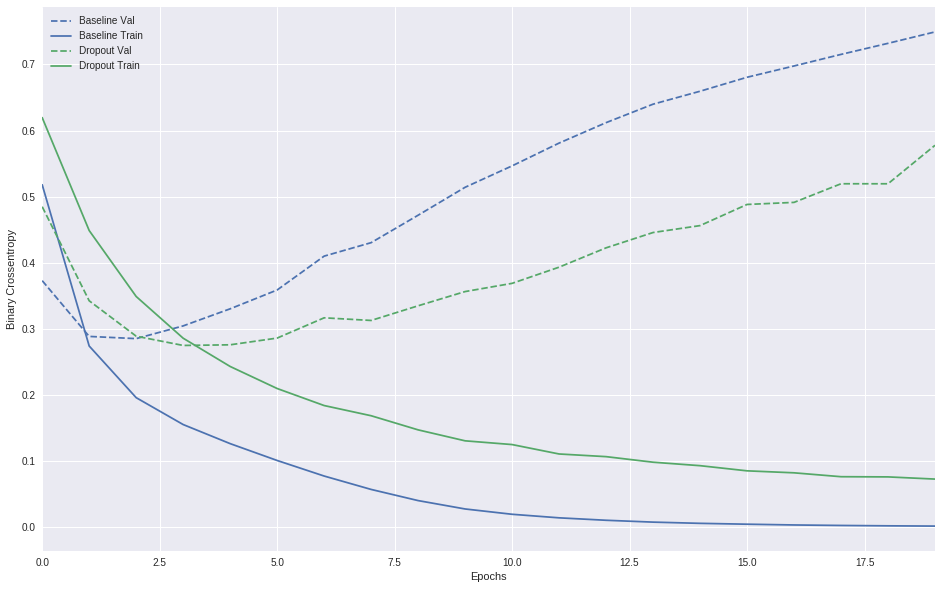

In [37]:
plot_history([('baseline', baseline_history),
              ('dropout', dpt_model_history)])

**The most common ways to prevent overfitting in neural networks:**

* Get more training data.
* Reduce the capacity of the network ( The complexity of the model).
* Add weight regularization.
* Add dropout.
* data-augmentation 
* batch normalization.



